# Bonus 

Če bi res želeli zaposliti najboljšega kandidata, v realnosti ne bi uporabili problema sekretarke. Pač pa bi si ogledali vse kandidate in šele potem zaposlili najboljšega.
Tako bomo definitivno vedno zaposlili najboljšega kandidata. 

Isto dosežemo tudi, če imamo 'na čakanju' lahko le enega kandidata. Tako tega zamenjamo le v primeru, ko se pojavi boljši kandidat. Ampak zelo verjetno je, da kandidat ne bo vesel, da ga nismo takoj izbrali. Zato nas lahko zavrne (npr. z verjetnostjo 1/2).

Očitno je ta metoda še vedno boljša od problema sekretarke, saj če jo izpeljemo do konca sigurno dobimo najboljšega kandidata, ki nas bo zavrnil 50 \% časa.

Kaj pa če bi se ustavili prej ali bi lahko dobili boljši rezultat, kot 50 \%? 


In [2]:
import numpy as np
import random
import porocni_problem as fun
import matplotlib.pyplot as plt

n = 100 # število kandidatk
m = 50000 #kolikokrat poženemo proces iskanja najbolšega partnerja

tabela_partnerjev = {}
for i in range(m):
    partnerji = list(range(1,n+1))
    random.shuffle(partnerji)
    tabela_partnerjev[i] = partnerji

In [3]:
vsotke_standard = [0] * n
vsotke_bonus = [0] * n

for stop in range(n):
    for i in range(m):
        if fun.NajbolsiPartner(tabela_partnerjev[i], stop) == 100:
            vsotke_standard[stop] += 1
        if fun.bonus(tabela_partnerjev[i], stop) == 100:
            vsotke_bonus[stop] += 1

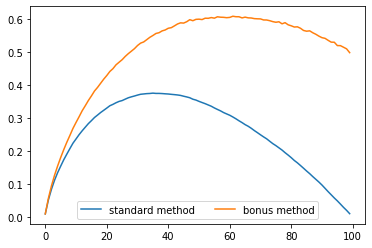

In [4]:
verjetnosti_standard = [x / m for x in vsotke_standard]
verjetnosti_bonus = [x / m for x in vsotke_bonus]
x = [i for i in range(n)]

plt.plot(x, verjetnosti_standard, label='standard method')
plt.plot(x, verjetnosti_bonus, label='bonus method')
plt.legend(ncol=3)
plt.show()

In [5]:
print("Če želimo zaposliti v povprečju najboljšo osebo, se moramo za novo metodo ustaviti pri", np.argmax(vsotke_bonus), 
      ". Tam bomo uspešni kar", 
      round(vsotke_bonus[np.argmax(vsotke_bonus)]/m,2), "% časa.")

Če želimo zaposliti v povprečju najboljšo osebo, se moramo za novo metodo ustaviti pri 61 . Tam bomo uspešni kar 0.61 % časa.


Če smo že uvajali neko verjetnost, da nas kandidat zavrne bi bilo smiselno implementirati še, da nas kandidat lahko zavrne, tudi, če ni bil na 'čakalni listi'. (Recimo v 10 \% primerov nas zavrne.) Seveda, če nas kandidat zavrne lahko iščemo naprej.

In [9]:
vsotke_bonus2 = [0] * n

for stop in range(n):
    for i in range(m):
        if fun.bonus2(tabela_partnerjev[i], stop,0.1) == 100:
            vsotke_bonus2[stop] += 1

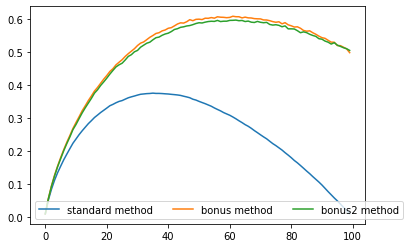

In [10]:
verjetnosti_standard = [x / m for x in vsotke_standard]
verjetnosti_bonus = [x / m for x in vsotke_bonus]
verjetnosti_bonus2 = [x / m for x in vsotke_bonus2]
x = [i for i in range(n)]

plt.plot(x, verjetnosti_standard, label='standard method')
plt.plot(x, verjetnosti_bonus, label='bonus method')
plt.plot(x, verjetnosti_bonus2, label='bonus2 method')
plt.legend(ncol=3)
plt.show()